In [1]:
 #Importing Libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries Imported')

Libraries Imported


In [87]:
df = pd.read_csv('data/input/Drastic-Model-Data-For-ML-Analysis_Co-ordinates.csv')

In [88]:
df.head()

,OBJECTID *,Shape *,pointid,grid_code,Vulnerabil,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media,Lat,Long
0,1,Point,3254,2,Low (47-78),<Null>,6,1,3,1,5,1,23.743022,90.223366
1,2,Point,3255,3,Medium (78-100),3,4,1,3,1,5,1,23.743036,90.224125
2,3,Point,3256,3,Medium (78-100),3,4,1,3,1,5,1,23.743050,90.224884
3,4,Point,3257,3,Medium (78-100),1,4,1,3,1,5,1,23.743063,90.225643
4,5,Point,3258,3,Medium (78-100),2,4,1,3,1,5,1,23.743077,90.226402


In [89]:
df = df.drop(['OBJECTID *', 'Shape *'], axis=1) # remove unnecessary columns

In [90]:
df.head()

,pointid,grid_code,Vulnerabil,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media,Lat,Long
0,3254,2,Low (47-78),<Null>,6,1,3,1,5,1,23.743022,90.223366
1,3255,3,Medium (78-100),3,4,1,3,1,5,1,23.743036,90.224125
2,3256,3,Medium (78-100),3,4,1,3,1,5,1,23.743050,90.224884
3,3257,3,Medium (78-100),1,4,1,3,1,5,1,23.743063,90.225643
4,3258,3,Medium (78-100),2,4,1,3,1,5,1,23.743077,90.226402


In [91]:
# <Null>
df1 = df.replace("<Null>", None)

In [92]:
# Check for missing values
print(df1.isnull().sum())  # Counts missing values per column
print(df1.info())  # Provides overall information

pointid                    0
grid_code                  0
Vulnerabil                 0
Tropograpy               460
Soil__Media              159
Net_Recharge              54
Impact_Vandose_Zone        0
Hydrolic_Conductivity      0
Depth_to_Acquifer          0
Aquirfer_Media             0
Lat                        0
Long                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31918 entries, 0 to 31917
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pointid                31918 non-null  int64  
 1   grid_code              31918 non-null  int64  
 2   Vulnerabil             31918 non-null  object 
 3   Tropograpy             31458 non-null  object 
 4   Soil__Media            31759 non-null  object 
 5   Net_Recharge           31864 non-null  object 
 6   Impact_Vandose_Zone    31918 non-null  int64  
 7   Hydrolic_Conductivity  31918 non-null  int64  
 8   Depth

In [93]:
df1.head(3)

,pointid,grid_code,Vulnerabil,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media,Lat,Long
0,3254,2,Low (47-78),None,6,1,3,1,5,1,23.743022,90.223366
1,3255,3,Medium (78-100),3,4,1,3,1,5,1,23.743036,90.224125
2,3256,3,Medium (78-100),3,4,1,3,1,5,1,23.743050,90.224884


### Data Cleaning

##### '''As we have imbalanced dataset, so we will use Stratified K-Fold technique where we may use Grid Search / Randomized Search to 
##### optimize the underlying hyperparameters.'''

'''
##### And we know that - 
##### Oversampling: This technique involves increasing the number of instances in the minority class.
##### Hybrid Approaches: Combining oversampling and undersampling techniques can be effective in certain scenarios.   
##### Class Weighting: Assigning different weights to different classes can help balance the impact of class imbalance.   
##### Algorithm Selection: Choosing algorithms that are robust to class imbalance, such as decision trees or ensemble methods 
##### like Random Forest and XGBoost.
'''

In [94]:
IGNORED_COLS_DURING_TRAINING = ['pointid','Vulnerabil', 'Lat', 'Long']

In [95]:
list(df.columns)

['pointid',
 'grid_code',
 'Vulnerabil',
 'Tropograpy',
 'Soil__Media',
 'Net_Recharge',
 'Impact_Vandose_Zone',
 'Hydrolic_Conductivity',
 'Depth_to_Acquifer',
 'Aquirfer_Media',
 'Lat',
 'Long']

In [96]:
WORKING_CLOS = list(df.columns)
for col in IGNORED_COLS_DURING_TRAINING:
  if col in list(df.columns):
    WORKING_CLOS.remove(col)
WORKING_CLOS

['grid_code',
 'Tropograpy',
 'Soil__Media',
 'Net_Recharge',
 'Impact_Vandose_Zone',
 'Hydrolic_Conductivity',
 'Depth_to_Acquifer',
 'Aquirfer_Media']

#### Imputation (Filling None values with Central values (Mean/Median/Mode), here is the Mean as all are numerical data
#### Using KNN Imputation..

In [11]:
from sklearn.impute import KNNImputer

In [97]:
df = pd.DataFrame(df1)

# Initialize KNNImputer with a specified number of neighbors
imputer = KNNImputer(n_neighbors=2)

In [98]:
vulnerabil_df = df[IGNORED_COLS_DURING_TRAINING]
vulnerabil_df

,pointid,Vulnerabil,Lat,Long
0,3254,Low (47-78),23.743022,90.223366
1,3255,Medium (78-100),23.743036,90.224125
2,3256,Medium (78-100),23.743050,90.224884
3,3257,Medium (78-100),23.743063,90.225643
4,3258,Medium (78-100),23.743077,90.226402
...,...,...,...,...
31913,3249,Medium (78-100),23.745464,90.322033
31914,3250,Very Low (2-47),23.745844,90.344047
31915,3251,Very Low (2-47),23.745857,90.344807
31916,3252,Very Low (2-47),23.745870,90.345566


In [99]:
# Apply KNN imputation on the entire DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(df.drop(columns=IGNORED_COLS_DURING_TRAINING)), columns=WORKING_CLOS)

In [100]:
merged_imputed_df = pd.concat([vulnerabil_df, df_imputed], axis=1)
merged_imputed_df

,pointid,Vulnerabil,Lat,Long,grid_code,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3254,Low (47-78),23.743022,90.223366,2.0,2.5,6.0,1.0,3.0,1.0,5.0,1.0
1,3255,Medium (78-100),23.743036,90.224125,3.0,3.0,4.0,1.0,3.0,1.0,5.0,1.0
2,3256,Medium (78-100),23.743050,90.224884,3.0,3.0,4.0,1.0,3.0,1.0,5.0,1.0
3,3257,Medium (78-100),23.743063,90.225643,3.0,1.0,4.0,1.0,3.0,1.0,5.0,1.0
4,3258,Medium (78-100),23.743077,90.226402,3.0,2.0,4.0,1.0,3.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31913,3249,Medium (78-100),23.745464,90.322033,3.0,1.0,6.0,3.0,3.0,2.0,5.0,1.0
31914,3250,Very Low (2-47),23.745844,90.344047,5.0,2.0,4.0,5.0,0.0,0.0,0.0,0.0
31915,3251,Very Low (2-47),23.745857,90.344807,5.0,2.0,5.0,5.0,0.0,0.0,0.0,0.0
31916,3252,Very Low (2-47),23.745870,90.345566,5.0,2.0,6.0,5.0,0.0,0.0,0.0,0.0


In [101]:
print("Original DataFrame:")
df1.head(3)

Original DataFrame:


,pointid,grid_code,Vulnerabil,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media,Lat,Long
0,3254,2,Low (47-78),None,6,1,3,1,5,1,23.743022,90.223366
1,3255,3,Medium (78-100),3,4,1,3,1,5,1,23.743036,90.224125
2,3256,3,Medium (78-100),3,4,1,3,1,5,1,23.743050,90.224884


In [102]:
print("\nDataFrame after KNN Imputation:")
merged_imputed_df.head(3)


DataFrame after KNN Imputation:


,pointid,Vulnerabil,Lat,Long,grid_code,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3254,Low (47-78),23.743022,90.223366,2.0,2.5,6.0,1.0,3.0,1.0,5.0,1.0
1,3255,Medium (78-100),23.743036,90.224125,3.0,3.0,4.0,1.0,3.0,1.0,5.0,1.0
2,3256,Medium (78-100),23.743050,90.224884,3.0,3.0,4.0,1.0,3.0,1.0,5.0,1.0


In [103]:
merged_imputed_df.describe()

,pointid,Lat,Long,grid_code,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
count,31918.000000,31918.000000,31918.000000,31918.000000,31918.000000,31918.000000,31918.000000,31918.000000,31918.000000,31918.000000,31918.000000
mean,15959.500000,23.692712,90.347267,2.351776,2.067830,3.164547,3.580143,2.720753,2.791215,3.054891,1.446958
std,9214.077282,0.037737,0.060929,1.268634,0.914545,1.758461,1.292347,0.789021,1.178903,1.591383,0.991199
min,1.000000,23.608236,90.221714,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7980.250000,23.662929,90.301523,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000
50%,15959.500000,23.690353,90.342420,3.000000,2.000000,4.000000,4.000000,3.000000,3.000000,3.000000,1.000000
75%,23938.750000,23.723006,90.399238,4.000000,3.000000,4.000000,5.000000,3.000000,4.000000,5.000000,1.000000
max,31918.000000,23.778971,90.475355,5.000000,5.000000,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [104]:
df_cleaned = merged_imputed_df

In [105]:
df_cleaned['pointid'].nunique()

31918

In [150]:
X, y = df_cleaned.drop(['grid_code'], axis=1), df['grid_code']

In [107]:
print(X.shape)
print(y.shape)

(31918, 11)
(31918,)


In [151]:
df_cleaned['pointid'].nunique()

31918

### Train-Test Splitting

In [48]:
###INFO: `support` is how many samples are in each class.

In [109]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score

#### ==> Using label binarize technique for ROC curve

#####     Binarize the output (One-vs-Rest)

In [152]:
y_bin = label_binarize(y, classes = np.unique(y))
n_classes = y_bin.shape[1]
print("shape: ",y_bin.shape)
print(f"n_classes: {n_classes}")

shape:  (31918, 5)
n_classes: 5


In [111]:
y_bin

array([[0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [153]:
# Split data into training and testing sets
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=42, stratify=y_bin)

In [113]:
X_train_bin.shape

(22342, 11)

In [114]:
X_test_bin

,pointid,Vulnerabil,Lat,Long,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
19712,23720,High (100-122),23.664692,90.423103,2.0,1.0,5.0,3.0,1.0,1.0,1.0
5160,8414,Medium (78-100),23.720584,90.298246,2.0,2.0,2.0,3.0,3.0,5.0,1.0
8070,11324,High (100-122),23.708313,90.397952,3.0,6.0,4.0,3.0,4.0,2.0,1.0
24084,30472,Very High (122-159),23.632520,90.422216,2.0,5.0,5.0,3.0,1.0,1.0,1.0
7466,10720,Low (47-78),23.708158,90.267376,3.0,4.0,2.0,1.0,2.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
28573,31827,High (100-122),23.615313,90.438485,4.0,3.0,5.0,4.0,2.0,1.0,4.0
15493,18863,High (100-122),23.680854,90.386352,2.0,1.0,5.0,3.0,4.0,2.0,1.0
6797,10051,Medium (78-100),23.711919,90.282481,1.0,4.0,2.0,3.0,2.0,5.0,1.0
6582,9836,Medium (78-100),23.714097,90.327229,1.0,2.0,3.0,3.0,3.0,4.0,1.0


In [54]:
y_test_bin

array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]])

In [154]:
class_labels = np.unique(y)
class_labels

array([1, 2, 3, 4, 5])

In [155]:
# Find the index of the maximum value in each row
ground_truth_indices = np.argmax(y_test_bin, axis=1) # it's binary data & we need to look for 1 value (true)

# Map the indices to the class labels
ground_truth_labels = [int(class_labels[i]) for i in ground_truth_indices]

print(ground_truth_labels)

[1, 3, 1, 4, 2, 3, 4, 4, 4, 1, 1, 3, 1, 2, 3, 4, 2, 4, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 4, 3, 4, 4, 1, 1, 1, 1, 3, 3, 3, 4, 3, 3, 1, 1, 4, 4, 3, 3, 1, 3, 1, 4, 3, 3, 1, 3, 1, 4, 1, 4, 1, 3, 4, 4, 1, 1, 3, 3, 1, 1, 4, 4, 3, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 1, 1, 3, 3, 1, 3, 1, 4, 1, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 3, 3, 3, 4, 1, 4, 3, 4, 1, 4, 4, 1, 3, 1, 3, 3, 1, 3, 4, 1, 1, 3, 4, 1, 2, 3, 3, 1, 1, 1, 1, 3, 3, 4, 3, 1, 1, 3, 1, 4, 1, 3, 3, 4, 1, 3, 3, 4, 1, 5, 1, 3, 1, 4, 1, 1, 3, 1, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 3, 1, 1, 4, 4, 1, 1, 2, 4, 1, 1, 3, 3, 1, 3, 4, 1, 3, 1, 3, 3, 1, 4, 1, 3, 1, 4, 3, 1, 4, 3, 1, 4, 2, 3, 1, 1, 1, 1, 2, 3, 1, 3, 4, 4, 4, 4, 1, 3, 1, 2, 4, 4, 4, 1, 3, 3, 1, 4, 4, 3, 4, 3, 1, 1, 4, 1, 3, 3, 4, 3, 4, 3, 4, 4, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 4, 3, 4, 1, 1, 1, 1, 3, 3, 1, 4, 3, 3, 4, 3, 1, 2, 1, 4, 1, 1, 2, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 4, 3, 1, 1, 3, 3, 3, 4, 4, 1, 1, 1, 4, 1, 4, 1, 1, 1, 4, 4, 1, 1, 1, 4, 4, 4, 1, 3, 4, 4, 3, 4, 4, 1, 3, 1, 1, 4, 4, 3, 1, 

### SVM (SVC)

In [57]:
from sklearn.svm import SVC

In [156]:
print(y)
print(y_bin)
print(f"y.shape: {y.shape}")
print(f"y_bin.shape: {y_bin.shape}")
print(n_classes)

0        2
1        3
2        3
3        3
4        3
        ..
31913    3
31914    5
31915    5
31916    5
31917    5
Name: grid_code, Length: 31918, dtype: int64
[[0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]
y.shape: (31918,)
y_bin.shape: (31918, 5)
5


In [157]:
# Train SVC with OneVsRest strategy
svc = OneVsRestClassifier(SVC(kernel='linear', probability=True))
svc.fit(X_train_bin.drop(columns=IGNORED_COLS_DURING_TRAINING), y_train_bin)

y_pred = svc.predict(
    X_test_bin.drop(columns=IGNORED_COLS_DURING_TRAINING)
)

print("SVC Accuracy:", accuracy_score(y_test_bin, y_pred))
print(classification_report(y_test_bin, y_pred))

y_score = svc.decision_function(
    X_test_bin.drop(columns=IGNORED_COLS_DURING_TRAINING)
)

SVC Accuracy: 0.5120091896407686
              precision    recall  f1-score   support

           0       0.56      0.59      0.57      4141
           1       1.00      0.64      0.78       381
           2       0.84      0.86      0.85      2612
           3       0.76      0.76      0.76      2426
           4       0.94      1.00      0.97        16

   micro avg       0.70      0.71      0.70      9576
   macro avg       0.82      0.77      0.79      9576
weighted avg       0.70      0.71      0.70      9576
 samples avg       0.61      0.71      0.64      9576



/Users/goava/PERSONAL/Daily-Learning-Resources/Data-Science/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [158]:
results = X_test_bin.copy()
results.head()

,pointid,Vulnerabil,Lat,Long,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
19712,23720,High (100-122),23.664692,90.423103,2.0,1.0,5.0,3.0,1.0,1.0,1.0
5160,8414,Medium (78-100),23.720584,90.298246,2.0,2.0,2.0,3.0,3.0,5.0,1.0
8070,11324,High (100-122),23.708313,90.397952,3.0,6.0,4.0,3.0,4.0,2.0,1.0
24084,30472,Very High (122-159),23.632520,90.422216,2.0,5.0,5.0,3.0,1.0,1.0,1.0
7466,10720,Low (47-78),23.708158,90.267376,3.0,4.0,2.0,1.0,2.0,5.0,3.0


In [159]:
test_ground_truth_df = pd.DataFrame(np.array(ground_truth_labels))
test_ground_truth_df 

,0
0,1
1,3
2,1
3,4
4,2
...,...
9571,1
9572,1
9573,3
9574,3


In [160]:
# Find the index of the maximum value in each row
predicted_indices = np.argmax(y_pred, axis=1) # it's binary data & we need to look for 1 value (true)

# Map the indices to the class labels
predicted_labels = [int(class_labels[i]) for i in predicted_indices]

print(predicted_labels)

[1, 3, 4, 4, 2, 3, 1, 1, 4, 1, 1, 3, 1, 3, 1, 1, 2, 4, 1, 1, 3, 3, 3, 1, 4, 1, 4, 1, 1, 1, 4, 3, 4, 4, 1, 4, 4, 1, 3, 1, 3, 4, 3, 3, 1, 1, 4, 4, 1, 3, 4, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 1, 3, 1, 1, 1, 4, 3, 3, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 3, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 3, 1, 4, 3, 4, 3, 3, 1, 1, 3, 3, 1, 4, 1, 1, 3, 4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 1, 3, 1, 4, 1, 1, 1, 4, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 3, 4, 1, 1, 1, 4, 1, 3, 1, 3, 1, 4, 1, 1, 3, 3, 1, 4, 4, 1, 1, 3, 1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 4, 3, 3, 2, 4, 1, 1, 1, 2, 1, 4, 3, 1, 4, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 3, 1, 4, 1, 4, 3, 1, 

In [161]:
test_prediction_df = pd.DataFrame(np.array(predicted_labels))
test_prediction_df

,0
0,1
1,3
2,4
3,4
4,2
...,...
9571,4
9572,1
9573,3
9574,1


#### Merging prediction and taking the ground truth with location params

In [162]:
df1 = pd.DataFrame({'pointid': results['pointid'].values.flatten().tolist()})
df2 = pd.DataFrame({'lat': results['Lat'].values.flatten().tolist()})
df3 = pd.DataFrame({'lon': results['Long'].values.flatten().tolist()})
df4 = pd.DataFrame({'vulnerabil': results['Vulnerabil'].values.flatten().tolist()})
df5 = pd.DataFrame({'grid_code': test_ground_truth_df.values.flatten().tolist()})
df6 = pd.DataFrame({'prediction': test_prediction_df.values.flatten().tolist()})

# Concatenate DataFrames side-by-side
merged_df = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)

print(merged_df)

      pointid        lat        lon           vulnerabil  grid_code  \
0       23720  23.664692  90.423103       High (100-122)          1   
1        8414  23.720584  90.298246      Medium (78-100)          3   
2       11324  23.708313  90.397952       High (100-122)          1   
3       30472  23.632520  90.422216  Very High (122-159)          4   
4       10720  23.708158  90.267376          Low (47-78)          2   
...       ...        ...        ...                  ...        ...   
9571    31827  23.615313  90.438485       High (100-122)          1   
9572    18863  23.680854  90.386352       High (100-122)          1   
9573    10051  23.711919  90.282481      Medium (78-100)          3   
9574     9836  23.714097  90.327229      Medium (78-100)          3   
9575    16640  23.688038  90.356605       High (100-122)          1   

      prediction  
0              1  
1              3  
2              4  
3              4  
4              2  
...          ...  
9571          

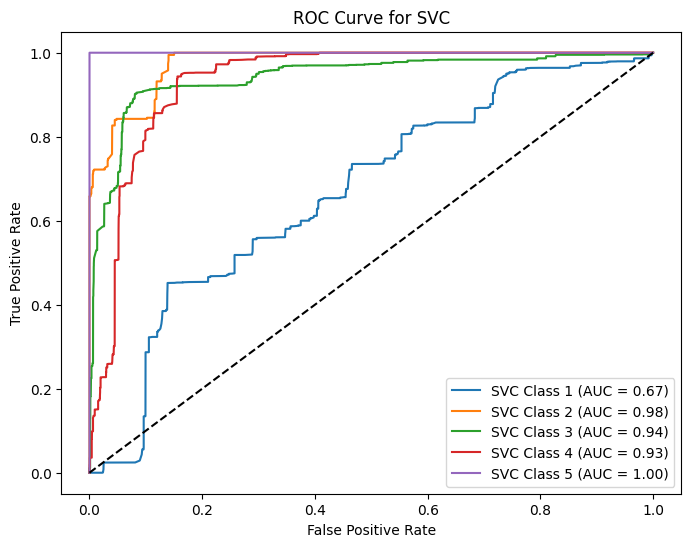

In [125]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"SVC Class {i+1} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVC")
plt.legend()
plt.show()

In [126]:
merged_df.to_csv('data/output/svm_result.csv',
          index=False,  # Don't include the index
          sep=',',      # Use comma as the delimiter
          decimal='.',  # Specify the decimal point
          header=True,  # Include the column headers
          encoding='utf-8')  # Specify the encoding

##### ***Sample code with test generated data using make_classification!! :D

In [67]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.datasets import make_classification

X_trainn.shape: (700, 20)
X_testt.shape: (300, 20)
y_trainn.shape: (700,)
y_testt.shape: (300,)
y_testt_bin.shape: (300, 3)
y_score: [[0.19 0.04 0.77]
 [0.8  0.03 0.17]
 [0.09 0.7  0.21]
 [0.62 0.38 0.  ]
 [0.03 0.89 0.08]]


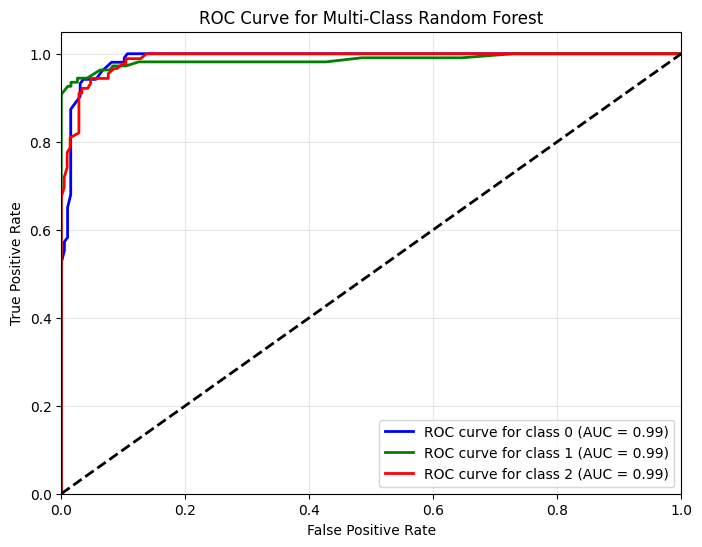

In [56]:
# 1. Create a synthetic multi-class dataset
XX, yy = make_classification(
    n_samples=1000,       # Number of samples
    n_features=20,        # Total number of features
    n_informative=10,     # Number of informative features
    n_redundant=5,        # Number of redundant features
    n_classes=3,          # Number of classes
    n_clusters_per_class=1,  # Number of clusters per class
    random_state=42
)
n_classess = 3  # Number of classes

# Split the dataset
X_trainn, X_testt, y_trainn, y_testt = train_test_split(XX, yy, test_size=0.3, random_state=42)

print(f"X_trainn.shape: {X_trainn.shape}")
print(f"X_testt.shape: {X_testt.shape}")
print(f"y_trainn.shape: {y_trainn.shape}")
print(f"y_testt.shape: {y_testt.shape}")

# Binarize the output (One-vs-Rest) after splitting
y_testt_bin = label_binarize(y_testt, classes=[0, 1, 2])

print(f"y_testt_bin.shape: {y_testt_bin.shape}")

# 2. Train the RandomForest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_trainn, y_trainn)  # Use 1D y_trainn for training

# 3. Get prediction probabilities for each class
y_score = rf.predict_proba(X_testt)
print(f"y_score: {y_score[:5]}")

# 4. Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classess):
    fpr[i], tpr[i], _ = roc_curve(y_testt_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 5. Plot the ROC curve
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red']
for i in range(n_classess):
    plt.plot(
        fpr[i],
        tpr[i],
        color=colors[i],
        lw=2,
        label=f"ROC curve for class {i} (AUC = {roc_auc[i]:.2f})",
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Random Forest")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

### Wrap RandomForestClassifier with OneVsRestClassifier (using StratifiedKFold & RandomizedSearchCV)

In [127]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.datasets import make_classification

In [128]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [129]:
X_test.head()

,pointid,Vulnerabil,Lat,Long,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
14370,17677,High (100-122),23.685162,90.393098,2.0,1.0,5.0,3.0,4.0,2.0,1.0
25741,26731,High (100-122),23.653813,90.441530,1.0,2.0,5.0,3.0,1.0,1.0,1.0
5172,8426,High (100-122),23.720743,90.307353,2.0,2.0,3.0,2.0,3.0,5.0,1.0
31212,2548,Medium (78-100),23.749073,90.288545,1.0,4.0,2.0,2.0,2.0,5.0,1.0
9165,12419,Very High (122-159),23.704094,90.396517,3.0,1.0,5.0,2.0,4.0,2.0,2.0


In [130]:
y_test.head()

14370    1
25741    1
5172     1
31212    3
9165     4
Name: grid_code, dtype: int64

In [131]:
print(X_train.shape)
print(y_train.shape)

(22342, 11)
(22342,)


In [132]:
# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Wrap it in OneVsRestClassifier
ovr = OneVsRestClassifier(rf)

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    "estimator__n_estimators": [50, 100, 200, 300],
    "estimator__max_depth": [None, 10, 20, 30],
    "estimator__min_samples_split": [2, 5, 10],
    "estimator__min_samples_leaf": [1, 2, 4],
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator = ovr, 
    param_distributions = param_dist, 
    n_iter = 10, 
    scoring = 'accuracy',
    # scoring = 'roc_auc_ovr'
    # cv = 3,
    cv = skf,
    random_state = 42
)

# Fit the model
random_search.fit(X_train.drop(columns=IGNORED_COLS_DURING_TRAINING), y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'estimator__n_estimators': 100, 'estimator__min_samples_split': 10, 'estimator__min_samples_leaf': 1, 'estimator__max_depth': 30}
Best Score: 0.9583745019154133


In [133]:
# Predict
y_pred = random_search.best_estimator_.predict(X_test.drop(columns=IGNORED_COLS_DURING_TRAINING))

# Calculate accuracy + other metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("F1-score (micro):", f1_micro)
print("F1-score (macro):", f1_macro)
print("F1-score (weighted):", f1_weighted)

Accuracy: 0.9558270676691729
F1-score (micro): 0.9558270676691729
F1-score (macro): 0.9627799100878619
F1-score (weighted): 0.9558077863500019


In [134]:
# Predict probabilities
y_score = random_search.best_estimator_.predict_proba(X_test.drop(columns=IGNORED_COLS_DURING_TRAINING))
print(f"y_score: {y_score}")
print(f"y_score.shape: {y_score.shape}")

y_score: [[0.96491894 0.         0.         0.03508106 0.        ]
 [0.9764143  0.         0.         0.0235857  0.        ]
 [0.91988935 0.         0.08011065 0.         0.        ]
 ...
 [0.99669545 0.00330455 0.         0.         0.        ]
 [0.00600565 0.         0.99399435 0.         0.        ]
 [0.         0.02208805 0.97791195 0.         0.        ]]
y_score.shape: (9576, 5)


In [135]:
n_classes = y.nunique()
n_classes

5

In [136]:
# Binarize the output
y_test_bin = label_binarize(y_test, classes = np.unique(y))
n_classes = y_test_bin.shape[1]
print(y_test_bin.shape)
n_classes

(9576, 5)


5

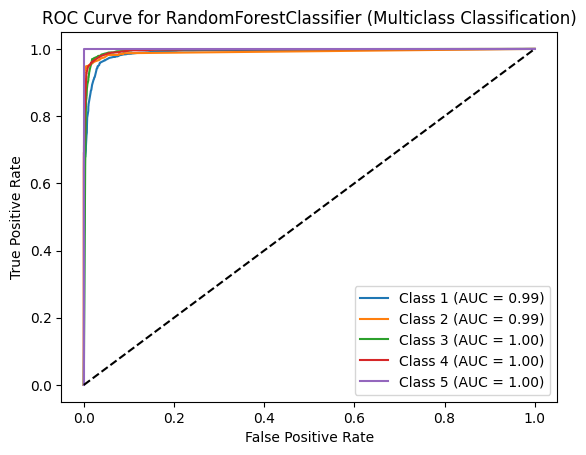

In [137]:
# Compute & plot ROC curve and AUC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i+1} (AUC = {roc_auc:.2f})")

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for RandomForestClassifier (Multiclass Classification)")
plt.legend()
plt.show()

In [138]:
y_pred

array([1, 1, 1, ..., 1, 3, 3])

In [139]:
# Map the indices to the class labels
predicted_labels = [int(val) for val in y_pred]

print(predicted_labels)

[1, 1, 1, 3, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 1, 1, 3, 3, 1, 1, 1, 4, 3, 1, 4, 3, 1, 1, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 1, 1, 3, 4, 1, 4, 1, 4, 1, 3, 4, 3, 4, 1, 4, 3, 1, 3, 3, 1, 4, 1, 4, 3, 3, 1, 1, 4, 4, 1, 3, 1, 3, 1, 4, 4, 2, 1, 4, 4, 4, 1, 1, 1, 1, 4, 4, 1, 4, 1, 4, 3, 3, 1, 4, 4, 4, 1, 3, 3, 3, 4, 3, 3, 1, 4, 3, 1, 1, 1, 1, 1, 1, 4, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 3, 4, 3, 3, 4, 1, 2, 1, 3, 1, 4, 4, 4, 3, 3, 1, 2, 1, 1, 4, 4, 4, 1, 4, 1, 3, 4, 3, 2, 1, 3, 1, 3, 4, 1, 4, 4, 1, 1, 4, 1, 1, 1, 1, 4, 1, 2, 1, 3, 3, 1, 4, 4, 3, 3, 1, 4, 1, 1, 3, 4, 1, 3, 3, 3, 4, 4, 1, 1, 4, 1, 1, 3, 1, 4, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 4, 3, 2, 1, 3, 3, 1, 3, 1, 1, 1, 1, 4, 1, 1, 3, 3, 3, 4, 1, 3, 2, 1, 3, 1, 1, 3, 1, 1, 4, 1, 1, 1, 4, 4, 3, 1, 3, 1, 1, 1, 1, 3, 4, 3, 3, 4, 1, 2, 1, 4, 4, 1, 3, 4, 3, 4, 4, 3, 3, 3, 3, 4, 3, 4, 1, 1, 1, 4, 3, 1, 4, 1, 1, 3, 3, 1, 3, 4, 4, 1, 1, 3, 3, 3, 1, 1, 3, 1, 4, 4, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 4, 4, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 

In [140]:
test_prediction_df = pd.DataFrame(np.array(predicted_labels))
test_prediction_df

,0
0,1
1,1
2,1
3,3
4,4
...,...
9571,3
9572,4
9573,1
9574,3


In [144]:
df1 = pd.DataFrame({'pointid': results['pointid'].values.flatten().tolist()})
df2 = pd.DataFrame({'lat': results['Lat'].values.flatten().tolist()})
df3 = pd.DataFrame({'lon': results['Long'].values.flatten().tolist()})
df4 = pd.DataFrame({'vulnerabil': results['Vulnerabil'].values.flatten().tolist()})
df5 = pd.DataFrame({'grid_code': test_ground_truth_df.values.flatten().tolist()})
df6 = pd.DataFrame({'prediction': test_prediction_df.values.flatten().tolist()})

# Concatenate DataFrames side-by-side
merged_df = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)

print(merged_df)

      pointid        lat        lon           vulnerabil  grid_code  \
0       23720  23.664692  90.423103       High (100-122)          1   
1        8414  23.720584  90.298246      Medium (78-100)          3   
2       11324  23.708313  90.397952       High (100-122)          1   
3       30472  23.632520  90.422216  Very High (122-159)          4   
4       10720  23.708158  90.267376          Low (47-78)          2   
...       ...        ...        ...                  ...        ...   
9571    31827  23.615313  90.438485       High (100-122)          1   
9572    18863  23.680854  90.386352       High (100-122)          1   
9573    10051  23.711919  90.282481      Medium (78-100)          3   
9574     9836  23.714097  90.327229      Medium (78-100)          3   
9575    16640  23.688038  90.356605       High (100-122)          1   

      prediction  
0              1  
1              1  
2              1  
3              3  
4              4  
...          ...  
9571          

In [145]:
merged_df.to_csv('data/output/rf_classifier_result.csv',
          index=False,  # Don't include the index
          sep=',',      # Use comma as the delimiter
          decimal='.',  # Specify the decimal point
          header=True,  # Include the column headers
          encoding='utf-8')  # Specify the encoding

### --> predict for a new datapoint (sample)

In [ ]:
# Example new data point
new_data_point = np.array([[5.0, 3.0, 1.0, 1.0, 2.0, 2.0, 5.0]])  # Replace with your actual data

# Assuming random_search is a fitted RandomizedSearchCV object
best_rf_model = random_search.best_estimator_  # Access best model

# Predict probabilities and class for RandomForestClassifier
class_probabilities = best_rf_model.predict_proba(new_data_point)
predicted_class = best_rf_model.predict(new_data_point)

print("Predicted Class Probabilities (RandomForest):", class_probabilities)
print("Predicted Class (RandomForest):", predicted_class)

# If using OneVsRestClassifier
class_probabilities_ovr = ovr_model.predict_proba(new_data_point)
predicted_class_ovr = np.argmax(class_probabilities_ovr, axis=1)

print("\nPredicted Class Probabilities (OneVsRest):", class_probabilities_ovr)
print("Predicted Class (OneVsRest):", predicted_class_ovr)